In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [80]:
df = pd.read_csv('all_month.csv')

# Looking at the structure of the data by using the head() and tail() function.
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.31,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.34,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.16,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.07,0.160,11.0,automatic,nc,nc


In [81]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8881,2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.470,0.120,7.0,automatic,nc,nc
8885,2023-12-19T02:34:46.768Z,57.893500,-153.765300,56.30,1.50,ml,NaN,NaN,NaN,0.32,...,2024-01-05T18:45:34.407Z,"41 km NNE of Larsen Bay, Alaska",earthquake,NaN,0.500,NaN,NaN,reviewed,ak,ak


In [82]:
# check for data types and duplicates
df.info()
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8886 non-null   object 
 1   latitude         8886 non-null   float64
 2   longitude        8886 non-null   float64
 3   depth            8886 non-null   float64
 4   mag              8886 non-null   float64
 5   magType          8886 non-null   object 
 6   nst              7092 non-null   float64
 7   gap              7092 non-null   float64
 8   dmin             5965 non-null   float64
 9   rms              8886 non-null   float64
 10  net              8886 non-null   object 
 11  id               8886 non-null   object 
 12  updated          8886 non-null   object 
 13  place            8886 non-null   object 
 14  type             8886 non-null   object 
 15  horizontalError  6349 non-null   float64
 16  depthError       8886 non-null   float64
 17  magError      

0       False
1       False
2       False
3       False
4       False
        ...  
8881    False
8882    False
8883    False
8884    False
8885    False
Length: 8886, dtype: bool

In [83]:
# Changing data type of time to datetime
df['time'] = pd.to_datetime(df['time'], dayfirst=True)

#creating separate columns for year, month and day to be used later
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             8886 non-null   datetime64[ns, UTC]
 1   latitude         8886 non-null   float64            
 2   longitude        8886 non-null   float64            
 3   depth            8886 non-null   float64            
 4   mag              8886 non-null   float64            
 5   magType          8886 non-null   object             
 6   nst              7092 non-null   float64            
 7   gap              7092 non-null   float64            
 8   dmin             5965 non-null   float64            
 9   rms              8886 non-null   float64            
 10  net              8886 non-null   object             
 11  id               8886 non-null   object             
 12  updated          8886 non-null   object             
 13  place            8

C:\Users\Alex\AppData\Local\Temp\ipykernel_2752\176446404.py:2: UserWarning: Parsing dates in %Y-%m-%dT%H:%M:%S.%f%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['time'] = pd.to_datetime(df['time'], dayfirst=True)


In [84]:
# checking how many unique countries are on the dataset 
df['country'] = df['place'].str.split(', ').str[1]
print(df['country'].unique())

['CA' 'Alaska' 'Indonesia' 'Hawaii' 'U.S. Virgin Islands' 'New Mexico'
 'Oklahoma' 'Puerto Rico' 'Montana' 'Tonga' nan 'Chile' 'Texas'
 'Washington' 'Nevada' 'Northern Mariana Islands' 'Philippines'
 'Tennessee' 'Timor Leste' 'B.C.' 'Dominican Republic' 'Idaho' 'Wyoming'
 'Afghanistan' 'Anguilla' 'Russia' 'Ohio' 'Panama' 'Japan' 'Taiwan'
 'Greece' 'Oregon' 'New Zealand' 'Argentina' 'Vanuatu' 'Guatemala' 'Utah'
 'Aleutian Islands' 'California' 'Japan region' 'Bolivia' 'Portugal'
 'Albania' 'Canada' 'Papua New Guinea' 'Svalbard and Jan Mayen' 'Fiji'
 'Nepal' 'Myanmar' 'Peru' 'Costa Rica' 'Mexico' 'Louisiana' 'Missouri'
 'Iceland' 'Arizona' 'Solomon Islands' 'Tajikistan' 'Turkey' 'India'
 'Kansas' 'El Salvador' 'Iran' 'South Carolina' 'China' 'Ecuador'
 'Arkansas' 'Wisconsin' 'Guam' 'Australia' 'Honduras'
 'Bosnia and Herzegovina' 'Maine' 'Nicaragua' 'New Hampshire' 'New York'
 'Georgia' 'Morocco' 'Maryland' 'Zambia' 'Japan Earthquake' 'Cyprus'
 'Martinique' 'New Caledonia' 'Venezuela' 'C

In [85]:
top_15_countries = df['country'].value_counts().iloc[:15]
df2 = pd.DataFrame(top_15_countries)
df2

,count
country,
CA,2672
Alaska,2490
Hawaii,556
Nevada,533
Texas,359
Montana,352
Puerto Rico,236
New Mexico,180
Washington,178


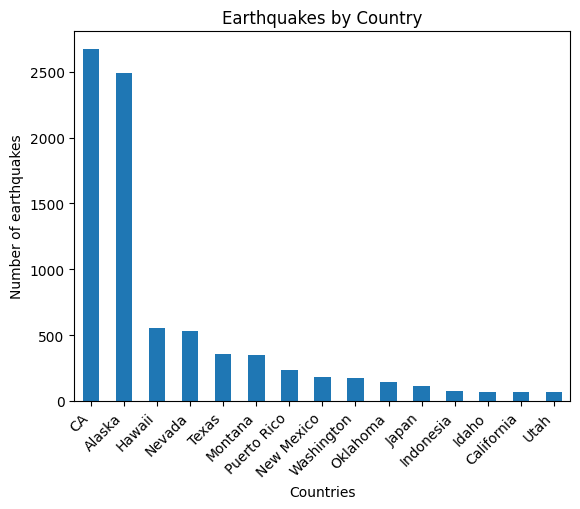

In [86]:
# plot of earthquakes by country
df2.plot(kind='bar', legend=None)
plt.title('Earthquakes by Country')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel("Number of earthquakes")
plt.xlabel("Countries")
plt.show()

Text(0, 0.5, 'Magnitude')

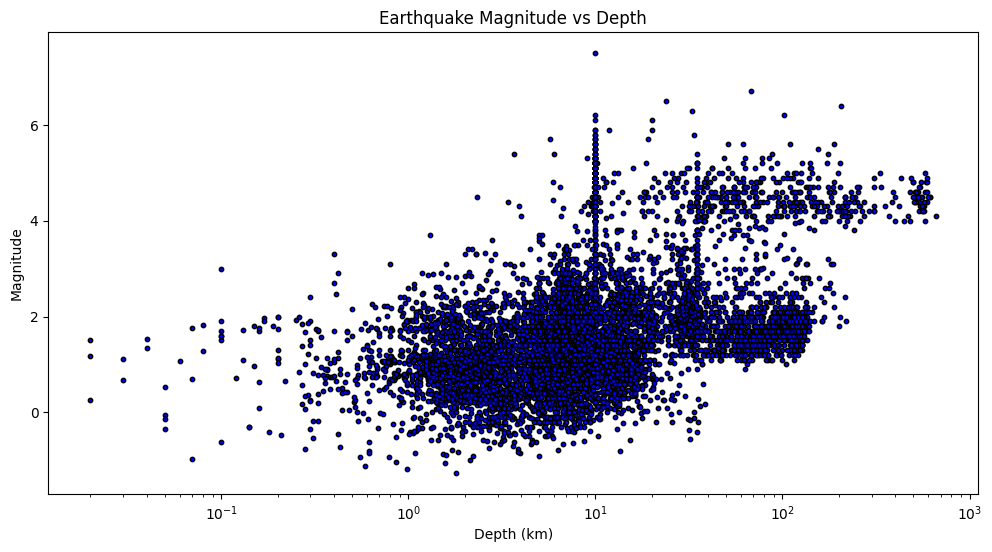

In [87]:
# plot of 
plt.figure(figsize=(12,6))
plt.title('Earthquake Magnitude vs Depth')
plt.scatter(df['depth'], df['mag'], color='blue', s=10, edgecolors='black')
plt.xscale('log')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1000x500 with 0 Axes>

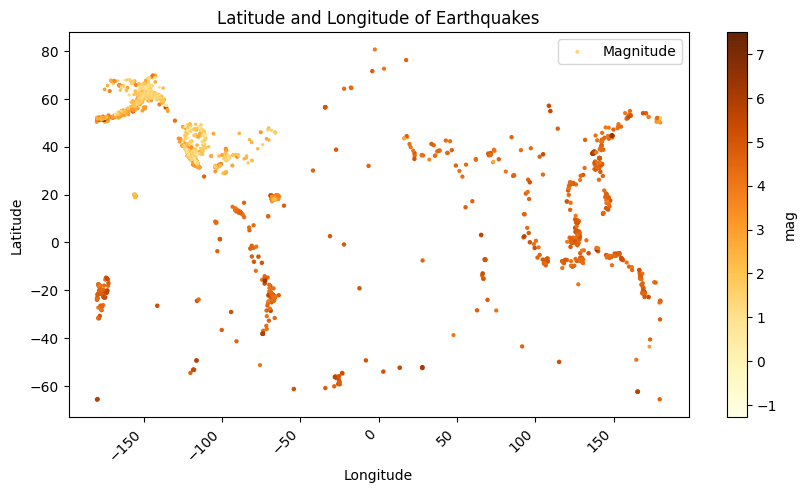

In [88]:
plt.figure(figsize=(10, 5))
df.plot(kind='scatter', x='longitude', y='latitude', s=df['mag'], c='mag', label='Magnitude', cmap='YlOrBr', figsize=(10, 5))
plt.title('Latitude and Longitude of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

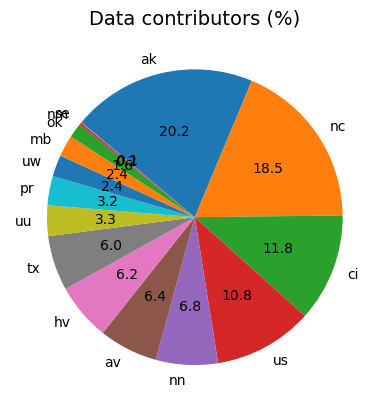

In [89]:
color_choice = ('orange', 'red', 'blue', 'green')
plt.title('Data contributors (%)', fontsize=14)
df['net'].value_counts().plot(kind='pie', legend=None, ylabel='', counterclock=False, startangle=140, autopct='%1.1f')
plt.show()

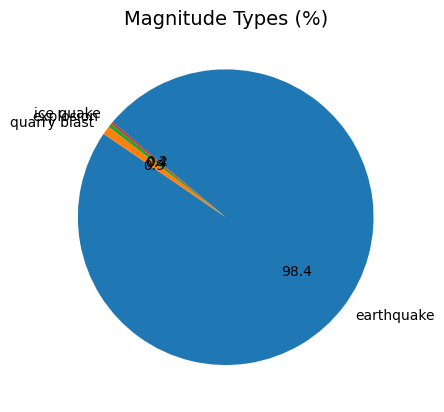

In [90]:
color_choice = ('orange', 'red', 'blue', 'green')
plt.title('Earthquake Sources (%)', fontsize=14)
df['type'].value_counts().plot(kind='pie', legend=None, ylabel='', counterclock=False, startangle=140, autopct='%1.1f')
plt.show()

In [91]:
table = df[['time','year', 'month', 'day']]
table

,time,year,month,day
0,2024-01-18 02:18:19.690000+00:00,2024,1,18
1,2024-01-18 02:16:52.710000+00:00,2024,1,18
2,2024-01-18 01:55:45.006000+00:00,2024,1,18
3,2024-01-18 01:48:21.130000+00:00,2024,1,18
4,2024-01-18 01:46:32.440000+00:00,2024,1,18
...,...,...,...,...
8881,2023-12-19 02:43:10.876000+00:00,2023,12,19
8882,2023-12-19 02:42:29.472000+00:00,2023,12,19
8883,2023-12-19 02:39:21.180000+00:00,2023,12,19
8884,2023-12-19 02:35:17.230000+00:00,2023,12,19


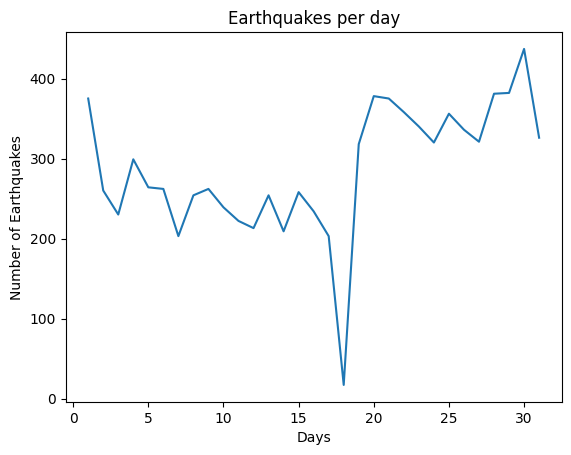

In [92]:
plt.title('Earthquakes per day')
sns.lineplot(data= df['day'].value_counts().sort_values())
plt.ylabel('Number of Earthquakes')
plt.xlabel('Days')

plt.show()

In [93]:
df['type'].count()

8886